<a href="https://colab.research.google.com/github/Samrajan2919/SAM/blob/master/Liver_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


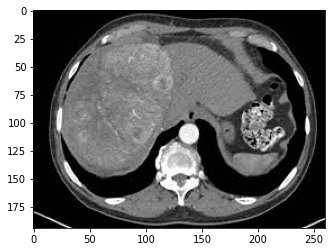

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [4 4 4]
  [4 4 4]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]
(194, 260, 3)


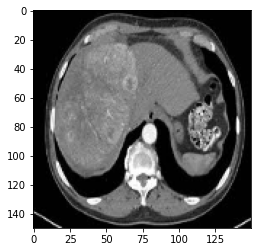

In [ ]:
 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
import random
 
TRAINDATADIR = ("/content/drive/My Drive/training_data")
TESTDATADIR= ("/content/drive/My Drive/testing_data")
CATEGORIES = ["abnormal liver", "normal liver"]
 
IMG_SIZE = 150
 
# DISPLAY THE SAMPLE IMAGE
 
for category in CATEGORIES:  # do anthracnose ,mildew , rust and spot
    path = os.path.join(TRAINDATADIR,category)  # create path to anthracnose ,mildew , rust and spot
    for img in os.listdir(path):  # iterate over each image per anthracnose ,mildew , rust and spot
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
 
        break  # we just want one for now so break
    break
print(img_array)
 
print(img_array.shape)
 
 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
 
training_data = []
 
def create_training_data():
    for category in CATEGORIES:  # do anthracnose ,mildew , rust and spot
 
        path = os.path.join(TRAINDATADIR,category)  # create path to anthracnose ,mildew , rust and spot
        class_num = CATEGORIES.index(category)  # get the classification  (0,1,2,3). 0=anthracnose ,1=mildew ,2=rust and 3=spot
 
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
 
create_training_data()
 
print(len(training_data))
 
 
random.shuffle(training_data)
 
for sample in training_data[:10]:     #to check our sample data
    print(sample[1])
 
 
#TESTING IMAGES
 
testing_data = []
 
def create_testing_data():
    for category in CATEGORIES:  # do anthracnose ,mildew , rust and spot
 
        path = os.path.join(TESTDATADIR,category)  # create path to anthracnose ,mildew , rust and spot
        class_num = CATEGORIES.index(category)  # get the classification  (0,1,2,3). 0=anthracnose ,1=mildew ,2=rust and 3=spot
 
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
 
create_testing_data()
 
print(len(testing_data))
 
 
random.shuffle(testing_data)
 
for sample in testing_data[:10]:     #to check our sample data
    print(sample[1])
 
 
train_X = []
train_y = []
 
test_X = []
test_y = []
 
for features,label in training_data:    #Loading image features and its label into train_X and train_y variable
    train_X.append(features)
    train_y.append(label)
 
print(train_X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))
 
train_X = np.array(train_X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
 
train_X = train_X.astype(np.float32)
 
print("X=",train_X)
print("y=",train_y)
 
pickle_out = open("train_X.pickle","wb")
pickle.dump(train_X, pickle_out)
pickle_out.close()
 
pickle_out = open("train_y.pickle","wb")
pickle.dump(train_y, pickle_out)
pickle_out.close()
 
 
for features,label in testing_data:    #Loading image features and its label into test_X and test_y variable
    test_X.append(features)
    test_y.append(label)
 
print(test_X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))
 
test_X = np.array(test_X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
 
test_X = test_X.astype(np.float32)
 
print("X=",test_X)
print("y=",test_y)
 
pickle_out = open("test_X.pickle","wb")
pickle.dump(test_X, pickle_out)
pickle_out.close()
 
pickle_out = open("test_y.pickle","wb")
pickle.dump(test_y, pickle_out)
pickle_out.close()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0

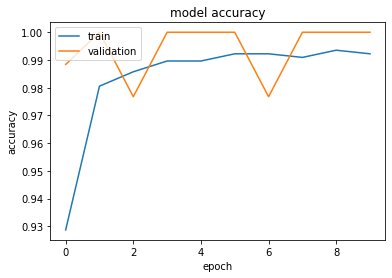

In [ ]:
 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt
 
pickle_in = open("train_X.pickle","rb")
X = pickle.load(pickle_in)
 
pickle_in = open("train_y.pickle","rb")
y1 = pickle.load(pickle_in)
 
y = to_categorical(y1)
 
 
X = X/255.0
 
model = Sequential()
 
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
 
model.add(Dense(64))
model.add(Activation('relu'))
 
model.add(Dense(2))
model.add(Activation('softmax'))
 
model.summary()
 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
history = model.fit(X,y, batch_size=32, epochs=10, validation_split=0.1)
 
 
model.save('cnn_model.h5')
 
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [ ]:
 from google.colab.patches import cv2_imshow
import cv2
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
import pickle
from matplotlib import pyplot as plt
 
CATEGORIES = ["abnormal liver", "normal liver"]
 
pickle_in = open("test_X.pickle","rb")
test_X = pickle.load(pickle_in)
 
pickle_in = open("test_y.pickle","rb")
test_y1 = pickle.load(pickle_in)
 
test_y = to_categorical(test_y1)
 
IMG_SIZE = 150
img_path = ('/content/drive/My Drive/testing_data/abnormal liver/images (11).jpeg')
img_array = cv2.imread(str(img_path, cv2.IMREAD_COLOR))
 
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
img_to_predict = new_array.astype(np.float32)
 
 
model = tf.keras.models.load_model("cnn_model.h5")
 
test_score = model.evaluate(test_X,test_y)
print('test loss:',test_score[0])
print('test accuracy:',test_score[1])
 
prediction = model.predict(img_to_predict)
 
print("prediction=",prediction)
 
label_val = np.argmax(prediction)
 
print("label_value=",label_val)
 
category=CATEGORIES[int(label_val)]
 
print("Disease_category=",category)

In [ ]:
 L = 2
W = 2
 
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
 
for i in np.arange(0, L*W):
    axes[i].imshow(img_array[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str([prediction[i]]), str([original[i]])))
    axes[i].axis('off')
 
plt.subplots_adjust(wspace = 1.2)